In [ ]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['figure.figsize'] = [16, 10]

np.set_printoptions(precision=5, suppress=True,formatter={'float': lambda x: f'{x:6.3f}'})
import yfinance as yf
import scipy.optimize as sco

<ipython-input-1-2b0cdc6a7c61>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
tickers = ['KBANK.BK', 'BBL.BK', 'KKP.BK', 'KTB.BK', 'TCAP.BK', 'TISCO.BK', 'BAY.BK']
tickers.sort()

start = '2015-04-01'
end = '2023-04-01'

stocks = pd.DataFrame()
for name in tickers:
  stocks[name] = yf.download(name, start=start, end=end)['Adj Close']

stocks = round(stocks,2)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
stocks

,BAY.BK,BBL.BK,KBANK.BK,KKP.BK,KTB.BK,TCAP.BK,TISCO.BK
Date,,,,,,,
2015-04-01,35.51,137.83,189.49,21.18,15.50,17.84,27.40
2015-04-02,34.90,139.35,190.31,20.91,15.64,17.84,27.10
2015-04-03,35.71,140.11,190.31,21.32,15.70,18.10,27.25
2015-04-07,36.32,140.86,191.96,21.32,15.84,17.97,27.40
2015-04-08,35.30,142.38,192.78,21.18,15.91,17.97,27.55
...,...,...,...,...,...,...,...
2023-03-27,28.75,152.00,132.50,64.50,16.70,44.50,101.00
2023-03-28,29.00,154.50,134.00,64.75,16.90,45.25,101.00
2023-03-29,29.50,156.00,134.50,65.00,16.80,45.50,101.50


<Axes: xlabel='Date'>

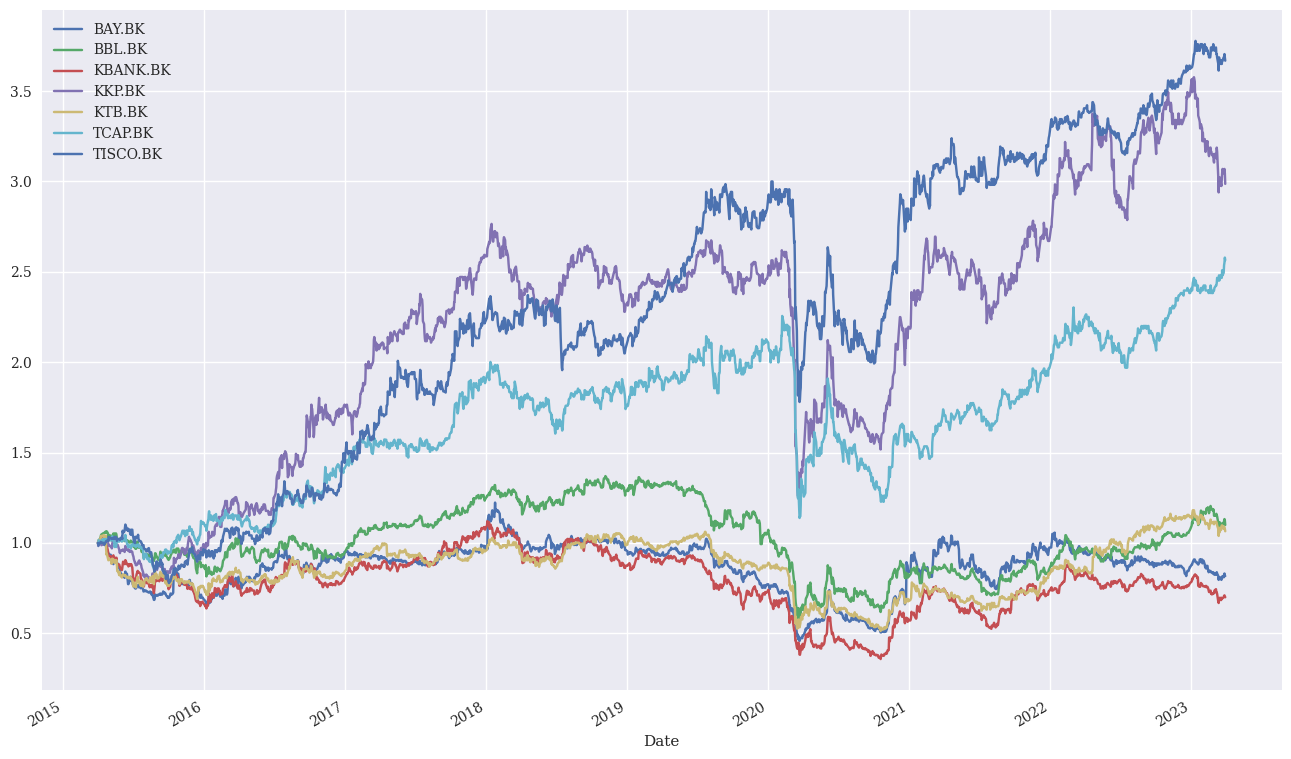

In [ ]:
(stocks[tickers]/stocks[tickers].iloc[0]).plot(figsize=(16,10))

In [ ]:
#compute daily log return
daily_ret = np.log(stocks/stocks.shift(1)).dropna()
daily_ret

,BAY.BK,BBL.BK,KBANK.BK,KKP.BK,KTB.BK,TCAP.BK,TISCO.BK
Date,,,,,,,
2015-04-02,-0.017328,0.010968,0.004318,-0.012830,0.008992,0.000000,-0.011009
2015-04-03,0.022944,0.005439,0.000000,0.019418,0.003829,0.014469,0.005520
2015-04-07,0.016938,0.005339,0.008633,0.000000,0.008878,-0.007208,0.005489
2015-04-08,-0.028486,0.010733,0.004263,-0.006588,0.004409,0.000000,0.005460
2015-04-09,0.017411,0.010550,0.010834,0.000000,0.012492,-0.007821,-0.005460
...,...,...,...,...,...,...,...
2023-03-27,-0.008658,-0.006557,0.007576,-0.007722,-0.011905,0.005634,0.004963
2023-03-28,0.008658,0.016314,0.011257,0.003868,0.011905,0.016713,0.000000
2023-03-29,0.017094,0.009662,0.003724,0.003854,-0.005935,0.005510,0.004938


In [ ]:
#compute Anuualized return
N_days = 252
annual_ret = daily_ret.mean()*N_days
annual_ret

BAY.BK     -0.026239
BBL.BK      0.012252
KBANK.BK   -0.046352
KKP.BK      0.141747
KTB.BK      0.008100
TCAP.BK     0.122016
TISCO.BK    0.168382
dtype: float64

array([[<Axes: title={'center': 'BAY.BK'}>,
        <Axes: title={'center': 'BBL.BK'}>,
        <Axes: title={'center': 'KBANK.BK'}>],
       [<Axes: title={'center': 'KKP.BK'}>,
        <Axes: title={'center': 'KTB.BK'}>,
        <Axes: title={'center': 'TCAP.BK'}>],
       [<Axes: title={'center': 'TISCO.BK'}>, <Axes: >, <Axes: >]],
      dtype=object)

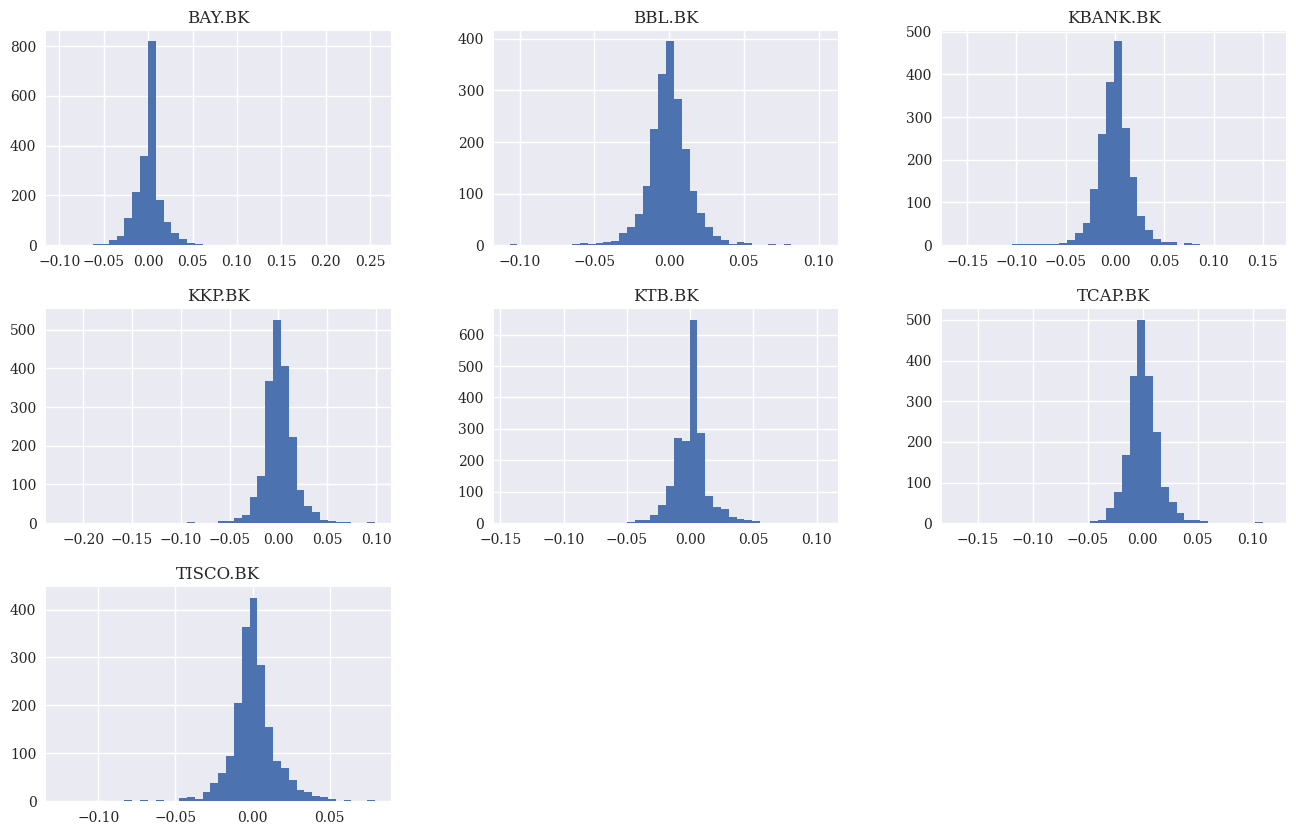

In [ ]:
daily_ret.hist(bins=40, figsize=(16,10))

In [ ]:
cov_mat = daily_ret.cov()*N_days
cov_mat

,BAY.BK,BBL.BK,KBANK.BK,KKP.BK,KTB.BK,TCAP.BK,TISCO.BK
BAY.BK,0.075515,0.029060,0.036965,0.028077,0.028795,0.025405,0.020521
BBL.BK,0.029060,0.058898,0.051995,0.032891,0.036941,0.028521,0.024200
KBANK.BK,0.036965,0.051995,0.089942,0.040949,0.046234,0.035751,0.029689
KKP.BK,0.028077,0.032891,0.040949,0.071269,0.033561,0.035754,0.034674
KTB.BK,0.028795,0.036941,0.046234,0.033561,0.061443,0.028344,0.023005
TCAP.BK,0.025405,0.028521,0.035751,0.035754,0.028344,0.062470,0.028011
TISCO.BK,0.020521,0.024200,0.029689,0.034674,0.023005,0.028011,0.055316


In [ ]:
N_PORTFOLIOS = 10 ** 5
n_assets = len(tickers)

In [ ]:
np.random.seed(42)
weights = np.random.random(size=(N_PORTFOLIOS, n_assets))
weights /=  np.sum(weights, axis=1)[:, np.newaxis]

In [ ]:
portf_rtns = np.dot(weights, annual_ret)

portf_vol = []
for i in range(0, len(weights)):
    portf_vol.append(np.sqrt(np.dot(weights[i].T, np.dot(cov_mat, weights[i]))))
portf_vol = np.array(portf_vol)  
portf_sharpe_ratio = portf_rtns / portf_vol

In [ ]:
portf_results_df = pd.DataFrame({'returns': portf_rtns, 'volatility': portf_vol,'sharpe_ratio': portf_sharpe_ratio})
portf_results_df

,returns,volatility,sharpe_ratio
0,0.027372,0.211151,0.129632
1,0.023730,0.199053,0.119213
2,0.079002,0.193622,0.408019
3,0.059893,0.196591,0.304659
4,0.076531,0.194438,0.393599
...,...,...,...
99995,0.062584,0.194130,0.322384
99996,0.071804,0.205699,0.349072
99997,0.047656,0.199962,0.238326
99998,0.051106,0.194805,0.262342


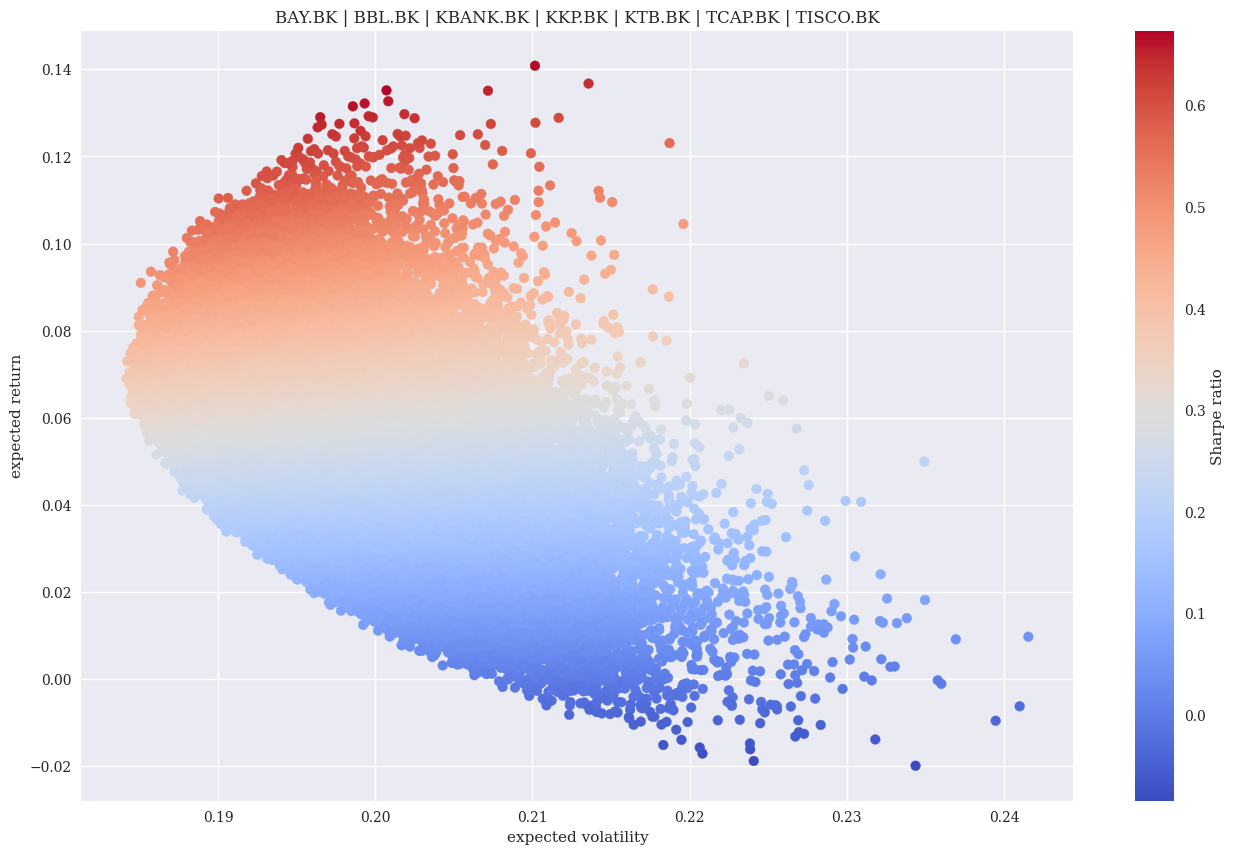

In [ ]:
plt.figure(figsize=(16, 10))
fig = plt.scatter(portf_results_df['volatility'], portf_results_df['returns'],
c=portf_results_df['sharpe_ratio'], cmap='coolwarm')
cb = plt.colorbar(fig)
cb.set_label('Sharpe ratio')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.title(' | '.join(tickers));

In [ ]:
# find the portfolio with lowest volatility 
low_vol_portfolio = portf_results_df.iloc[ portf_results_df['volatility'].idxmin() ]
print("Global Minimum Volatility portfolio:")
print("- return      : {:.2f}%".format(low_vol_portfolio[0]*100) )
print("- volatility  : {:.2f}%".format(low_vol_portfolio[1]*100) )
print("- sharpe ratio: {:.2f}".format(low_vol_portfolio[2]) )

# find the portfolio with highest sharpe ratio
high_sharpe_portfolio = portf_results_df.iloc[ portf_results_df['sharpe_ratio'].idxmax() ]
print("Maximum Sharpe Ratio portfolio:")
print("- return      : {:.2f}%".format(high_sharpe_portfolio[0]*100) )
print("- volatility  : {:.2f}%".format(high_sharpe_portfolio[1]*100) )
print("- sharpe ratio: {:.2f}".format(high_sharpe_portfolio[2]) )

Global Minimum Volatility portfolio:
- return      : 6.90%
- volatility  : 18.42%
- sharpe ratio: 0.37
Maximum Sharpe Ratio portfolio:
- return      : 13.52%
- volatility  : 20.07%
- sharpe ratio: 0.67


In [ ]:
#Lets plot an efficient frontier too for that lets figure out data points on efficient frontier
N_POINTS = 100
portf_vol_ef = []
indices_to_skip = []

portf_rtns_ef = np.linspace(portf_results_df.returns.min(), 
                            portf_results_df.returns.max(), 
                            N_POINTS)
portf_rtns_ef = np.round(portf_rtns_ef, 2)    
portf_rtns = np.round(portf_rtns, 2)

for point_index in range(N_POINTS):
    if portf_rtns_ef[point_index] not in portf_rtns:
        indices_to_skip.append(point_index)
        continue
    matched_ind = np.where(portf_rtns == portf_rtns_ef[point_index])
    portf_vol_ef.append(np.min(portf_vol[matched_ind]))
    
portf_rtns_ef = np.delete(portf_rtns_ef, indices_to_skip)

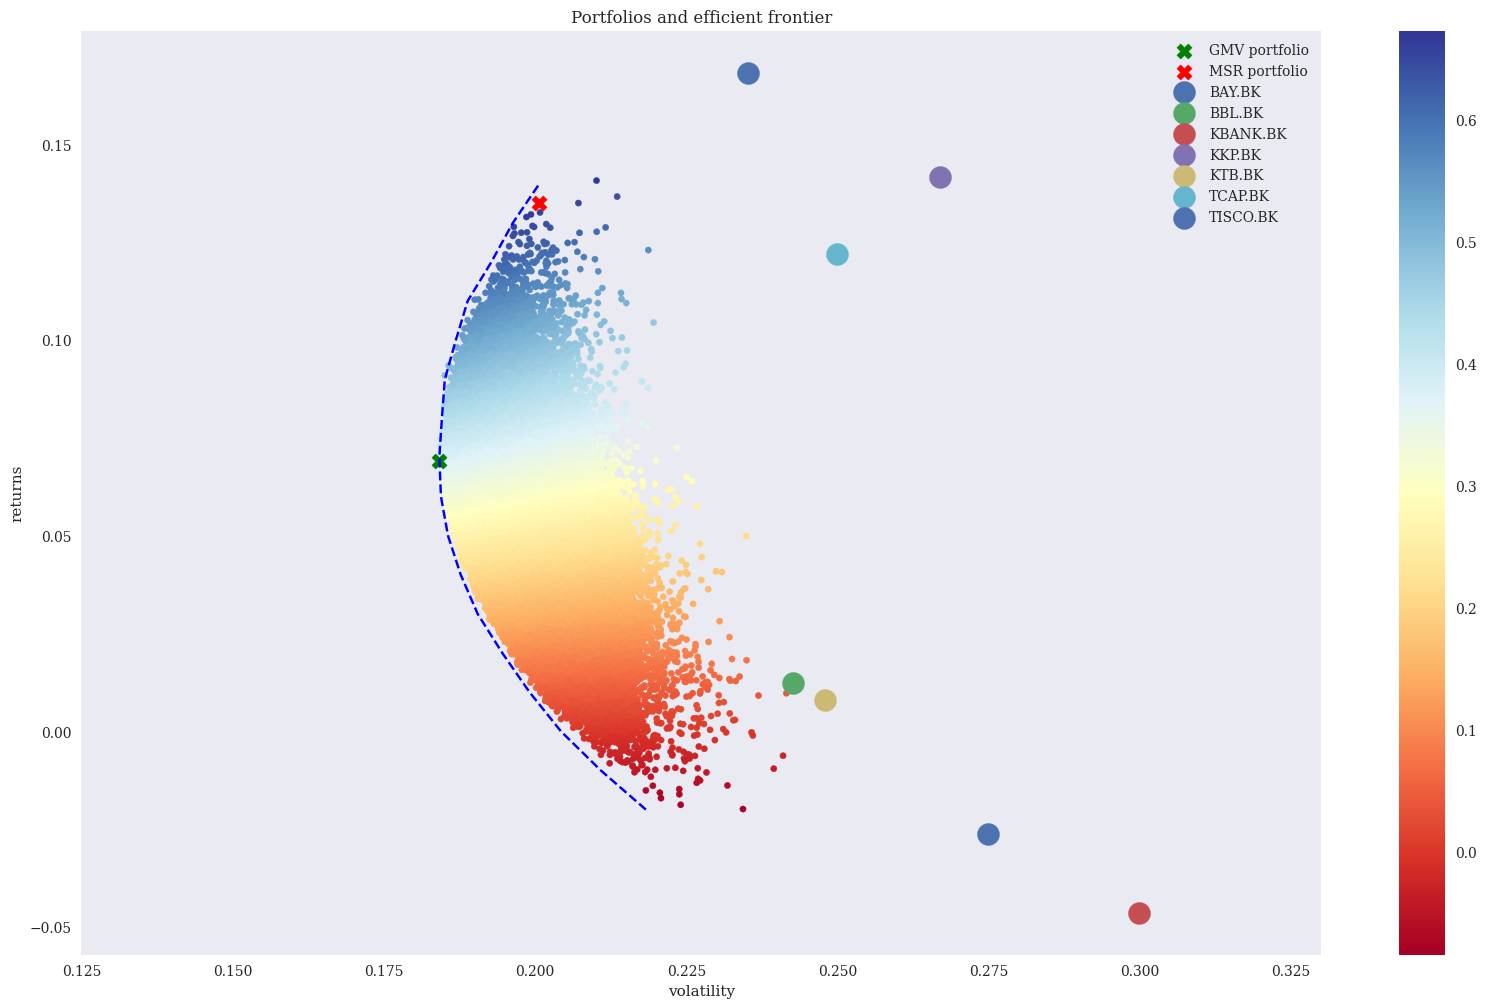

In [ ]:
#Plotting EF, GMV, MSR and individual stocks returns vs volitility

fig, ax = plt.subplots(1,1, figsize=(20,12)) 

im = ax.scatter(portf_results_df["volatility"], portf_results_df["returns"], c=portf_results_df["sharpe_ratio"], s=20, edgecolor=None, label=None, cmap='RdYlBu')
ax.set_title("Portfolios and efficient frontier")
ax.set_xlabel("volatility")
ax.set_ylabel("returns")
ax.grid()

ax.plot(portf_vol_ef, portf_rtns_ef, 'b--')
ax.scatter(low_vol_portfolio[1],     low_vol_portfolio[0],     marker="X", color='g', s=120, label="GMV portfolio")
ax.scatter(high_sharpe_portfolio[1], high_sharpe_portfolio[0], marker="X", color='r', s=120, label="MSR portfolio")
for asset_index in range(n_assets):
    ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]), 
                y=annual_ret[asset_index], 
                #marker=MARKS[asset_index], 
                s=250, 
                #color='black',
                label=tickers[asset_index])

ax.set_xlim([0.125,0.33])
ax.legend()

fig.colorbar(im, ax=ax)
plt.show()


In [ ]:
def neg_sharpe_ratio(w, avg_rtns, cov_mat, rf_rate):
    portf_returns = np.sum(avg_rtns * w)
    portf_volatility = np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))
    portf_sharpe_ratio = (portf_returns - rf_rate) / portf_volatility
    return -portf_sharpe_ratio

def port_vol(w, avg_rtns, cov_mat):
    portf_returns = np.sum(avg_rtns * w)
    portf_volatility = np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))
    return portf_volatility 

def get_portf_rtn(w, avg_rtns):
    return np.sum(avg_rtns * w)

In [ ]:
RF_RATE = 0

args = (annual_ret, cov_mat, RF_RATE)
constraints = ({'type': 'eq', 
                'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0,1) for asset in range(n_assets))
initial_guess = n_assets * [1. / n_assets]

max_sharpe_portf_opt = sco.minimize(neg_sharpe_ratio, 
                                x0=initial_guess, 
                                args=args,
                                method='SLSQP', 
                                bounds=bounds, 
                                constraints=constraints)

In [ ]:
max_sharpe_portf_w = max_sharpe_portf_opt['x']
print("Global Maximum Sharpe Ratio portfolio:")
max_sharpe_portf = {'Return': get_portf_rtn(max_sharpe_portf_w, 
                                            annual_ret),
                    'Volatility': port_vol(max_sharpe_portf_w, 
                                                annual_ret, 
                                                cov_mat),
                    'Sharpe Ratio': -max_sharpe_portf_opt['fun']}
max_sharpe_portf

Global Maximum Sharpe Ratio portfolio:


{'Return': 0.15701307095856104,
 'Volatility': 0.21128858369589612,
 'Sharpe Ratio': 0.7431214134339938}

In [ ]:
args = (annual_ret, cov_mat)
min_potf_vol_opt = sco.minimize(port_vol, 
                                x0=initial_guess, 
                                args=args,
                                method='SLSQP', 
                                bounds=bounds, 
                                constraints=constraints)

In [ ]:
#Optimal Weight for Maximum Sharpe Ratio Portfolio
opt_min_vol_w = min_potf_vol_opt['x']
opt_min_vol_w

array([ 0.173,  0.165,  0.000,  0.014,  0.167,  0.173,  0.308])

In [ ]:
print("Global Minimum Volitility portfolio:")
min_potf_vol = {'Return': get_portf_rtn(opt_min_vol_w, 
                                            annual_ret),
                    'Volatility': port_vol(opt_min_vol_w, 
                                                annual_ret, 
                                                cov_mat),
                    'Sharpe Ratio': -neg_sharpe_ratio(opt_min_vol_w, 
                                                annual_ret, 
                                                cov_mat,0)}
min_potf_vol

Global Minimum Volitility portfolio:


{'Return': 0.07394034440483403,
 'Volatility': 0.18376367896264303,
 'Sharpe Ratio': 0.40236647863294694}

In [ ]:
ret_msr = (daily_ret*max_sharpe_portf_w).sum(axis='columns')
total_ret_msr = (ret_msr+1).cumprod()
ret_gmv = (daily_ret*opt_min_vol_w).sum(axis='columns')
total_ret_gmv = (ret_gmv+1).cumprod()

In [ ]:
eweights = np.array(n_assets * [1. / n_assets,])
ret_ewp = (daily_ret*eweights).sum(axis='columns')
total_ret_ewp = (ret_ewp+1).cumprod()

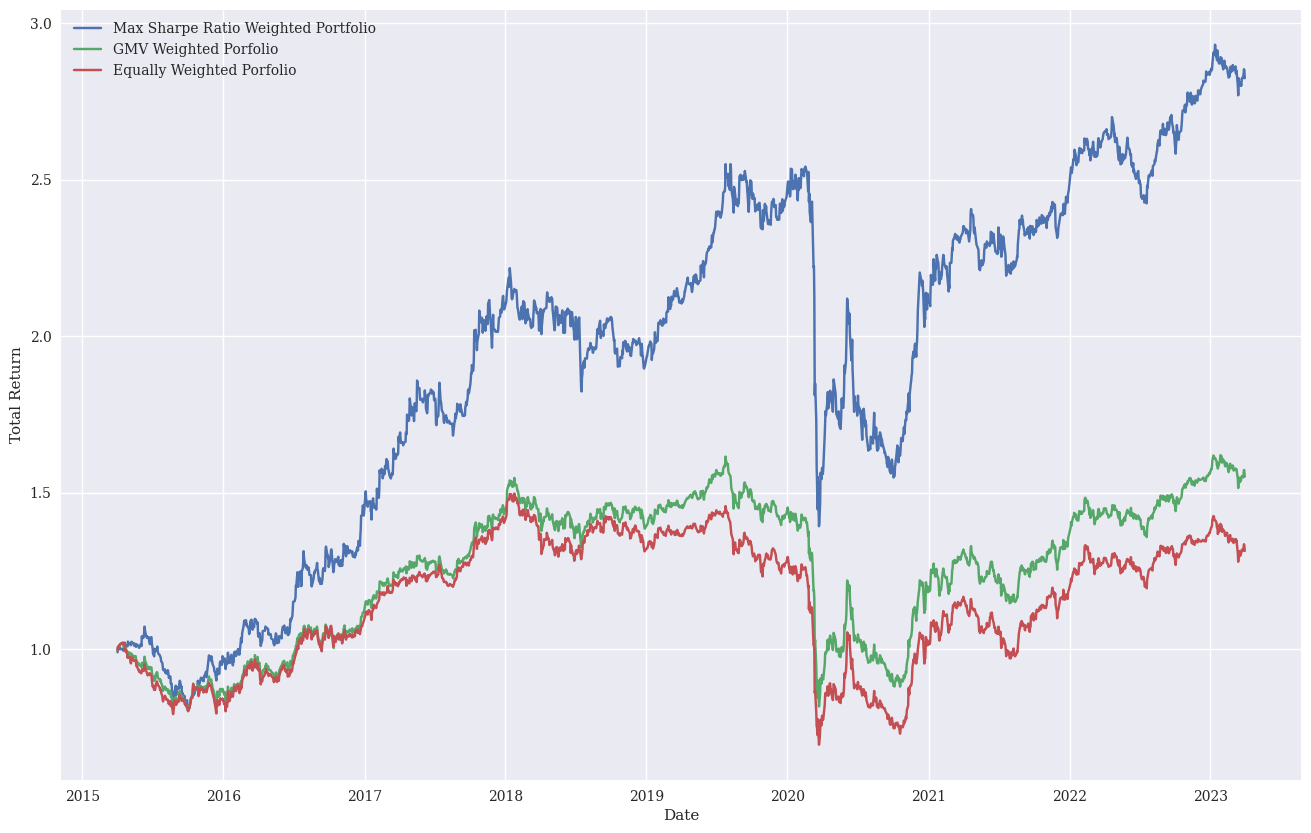

In [ ]:
plt.plot(total_ret_msr, label='Max Sharpe Ratio Weighted Portfolio')
plt.plot(total_ret_gmv, label='GMV Weighted Porfolio')
plt.plot(total_ret_ewp, label='Equally Weighted Porfolio')
plt.xlabel('Date')
plt.ylabel('Total Return')
plt.legend(loc="upper left")